In [41]:
# Cvičení

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas
import requests
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

# Pracuj se souborem `wine-regions.csv`. Každý záznam obsahuje informace o vzorku vína.
# Všechny vzorky pocházejí z jednoho regionu v Itálii, ale v datech se nachází několik různých odrůd.
# Naší úlohou bude data uspořádat do shluků, které by mohly odpovídat odrůdám.

# Dejme tomu, že víme, že vzorky pocházejí ze tří odrůd, ale ztratili jsme informaci o tom,
# který vzorek je odkud. Máme tedy počet clusterů = 3.

# Nacteni dat
X = pandas.read_csv("wine-regions.csv")

# X.describe()
# X.isna().sum()

# Normalizace dat
scaler = StandardScaler()
X = scaler.fit_transform(X)

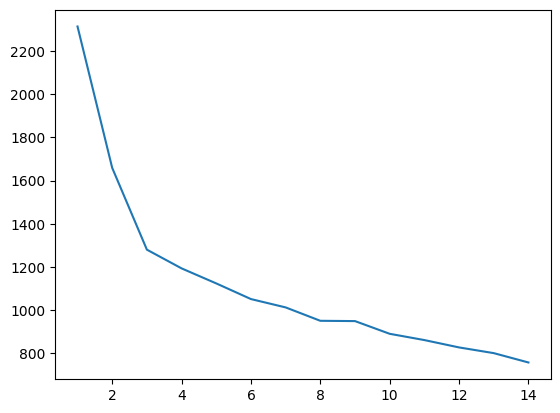

In [42]:
distances = []
cluster_counts = range(1, 15)
 
for k in cluster_counts:
    model = KMeans(n_clusters=k, n_init="auto").fit(X)
    model.fit(X)
    distances.append(model.inertia_)

plt.plot(cluster_counts, distances,)

In [43]:
tsne = TSNE(
    n_components=2,
    random_state=42,
)
X = tsne.fit_transform(X)

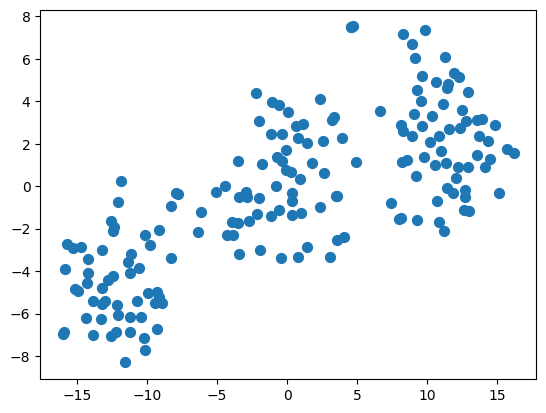

In [44]:
plt.scatter(X[:, 0], X[:, 1], s=50)

In [45]:
model = KMeans(n_clusters=3, random_state=42, n_init="auto")
labels = model.fit_predict(X)

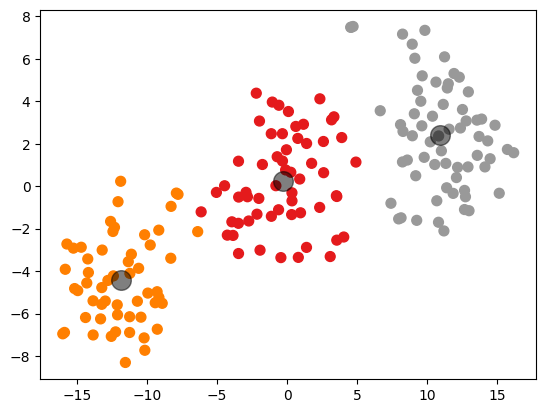

In [46]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="Set1")
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5)

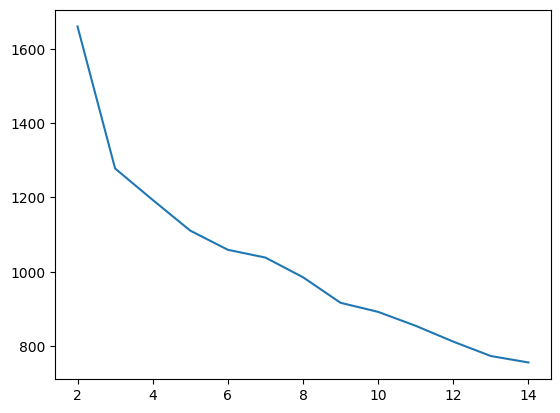

In [47]:
X = pandas.read_csv("wine-regions.csv")
scaler = StandardScaler()
X = scaler.fit_transform(X)

distances = []
cluster_counts = range(2, 15)
 
for k in cluster_counts:
    model = KMeans(n_clusters=k, n_init="auto").fit(X)
    model.fit(X)
    distances.append(model.inertia_)

plt.plot(cluster_counts, distances,)

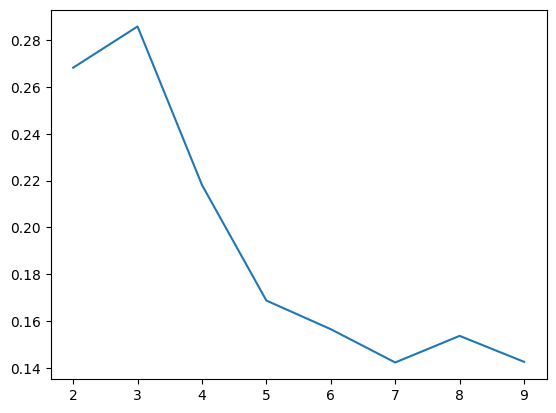

In [49]:
scores = []
cluster_counts = range(2, 10)
 
for k in cluster_counts:
    model = KMeans(n_clusters=k, n_init="auto").fit(X)
    labels = model.fit_predict(X)
    scores.append(silhouette_score(X, labels))

plt.plot(cluster_counts, scores,)